# Genetics & Genomics – Genomics Project

In this exercise we are working with a transcriptomics dataset containing 80 samples. 40 samples are
biological replicates of human preadipocytes, and the 40 others are differentiated adipocytes. We aim
at visualizing these two conditions and identify the key genes that are markers of adipocytes.
The main dataset is a simple “count matrix” containing genes (in rows) and samples (in columns).

### 1. Load and visualize the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### a. Start by loading the count matrix (transcriptomics.dataset.txt) and display it. Genes are represented by their Ensembl IDs, and should be the row indexes. What is the size of the matrix?

In [2]:
transcriptomics = pd.read_csv('data/transcriptomics.dataset.txt', sep = '\t', index_col = 0)
id_to_genes = pd.read_csv('data/Homo_sapiens.GRCh37.75.gene_annotation.txt', sep = '\t')

In [3]:
display(transcriptomics, transcriptomics.shape)

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273489,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(63677, 80)

##### b. What type of data do you have? Normalized or raw read counts (integer)?

> From a naive inspection it seems, we have raw read counts (integer values) for the transcriptomics matrix above. We can see this with the range of values per gene, provided down below.

In [4]:
gene_expression_range = pd.DataFrame(transcriptomics.apply(lambda x : [min(x), max(x)],
                        axis = 1).reset_index(drop = True), columns = ['r'])
gene_expression_range.sample(10)

,r
30946,"[0, 0]"
11902,"[102, 724]"
17528,"[0, 5]"
38221,"[0, 0]"
46250,"[0, 0]"
8654,"[0, 11]"
10455,"[32, 135]"
31212,"[0, 0]"
40336,"[0, 3]"
2412,"[20, 481]"


##### c. Identify the two groups of samples using the column names. Create a dictionary with mapping your sample names to their groups (Adipo, PreAdipo).

In [5]:
adipocyte = transcriptomics.loc[:, transcriptomics.columns.str.endswith('adipo')]
preadipocyte = transcriptomics.loc[:, transcriptomics.columns.str.endswith("preadi")]

In [6]:
display(len(adipocyte.iloc[0]), len(preadipocyte.iloc[0]))

40

40

In [7]:
samples = pd.Series(transcriptomics.columns).apply(
    lambda x : 'Sample_' + x.split('_')[1]).values.tolist()
sample_group = pd.Series(transcriptomics.columns).apply(lambda x : x.split('_')[2]).values.tolist()

In [8]:
sample_dictionnary = dict(zip(samples, sample_group))
sample_dictionnary

{'Sample_1': 'preadi',
 'Sample_2': 'preadi',
 'Sample_3': 'preadi',
 'Sample_4': 'preadi',
 'Sample_5': 'preadi',
 'Sample_6': 'preadi',
 'Sample_7': 'preadi',
 'Sample_8': 'preadi',
 'Sample_9': 'preadi',
 'Sample_10': 'preadi',
 'Sample_11': 'preadi',
 'Sample_12': 'preadi',
 'Sample_13': 'preadi',
 'Sample_14': 'preadi',
 'Sample_15': 'preadi',
 'Sample_16': 'preadi',
 'Sample_17': 'preadi',
 'Sample_18': 'preadi',
 'Sample_19': 'preadi',
 'Sample_20': 'preadi',
 'Sample_21': 'preadi',
 'Sample_22': 'preadi',
 'Sample_23': 'preadi',
 'Sample_24': 'preadi',
 'Sample_25': 'preadi',
 'Sample_26': 'preadi',
 'Sample_27': 'preadi',
 'Sample_28': 'preadi',
 'Sample_29': 'preadi',
 'Sample_30': 'preadi',
 'Sample_31': 'preadi',
 'Sample_32': 'preadi',
 'Sample_33': 'preadi',
 'Sample_34': 'preadi',
 'Sample_35': 'preadi',
 'Sample_36': 'preadi',
 'Sample_37': 'preadi',
 'Sample_38': 'preadi',
 'Sample_39': 'preadi',
 'Sample_40': 'preadi',
 'Sample_41': 'adipo',
 'Sample_42': 'adipo',
 'S

##### d. Filtering: Remove the genes that are not expressed in any sample (i.e. only 0s)

In [9]:
#summing the gene expression values
transcriptomics['unexpressed'] = transcriptomics.sum(axis = 1)

#removing null sums
filtered_genes = transcriptomics.drop(index = 
    transcriptomics[transcriptomics['unexpressed'] == 0].index.tolist()).drop('unexpressed', axis = 1)

In [10]:
filtered_genes

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,0,0,0,1,0,5,0,0,0,0,...,0,0,0,0,0,12,0,0,0,0
ENSG00000273486,0,0,0,0,1,0,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
ENSG00000273487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273489,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> The new gene pool has 30238 genes.

##### e. Normalization: Check the sum of the reads/counts per sample, to see if you need to normalize for library depth. Normalize if needed, using a CPM calculation. Show the depth as a barplot.

In [11]:
sum_counts = filtered_genes.apply(lambda x : x.sum(), axis = 0)

In [12]:
sum_counts

Sample_1_preadi    1000000
Sample_2_preadi    1000000
Sample_3_preadi    1000000
Sample_4_preadi    1000000
Sample_5_preadi    1000000
                    ...   
Sample_76_adipo    1000000
Sample_77_adipo    1000000
Sample_78_adipo    1000000
Sample_79_adipo    1000000
Sample_80_adipo    1000000
Length: 80, dtype: int64

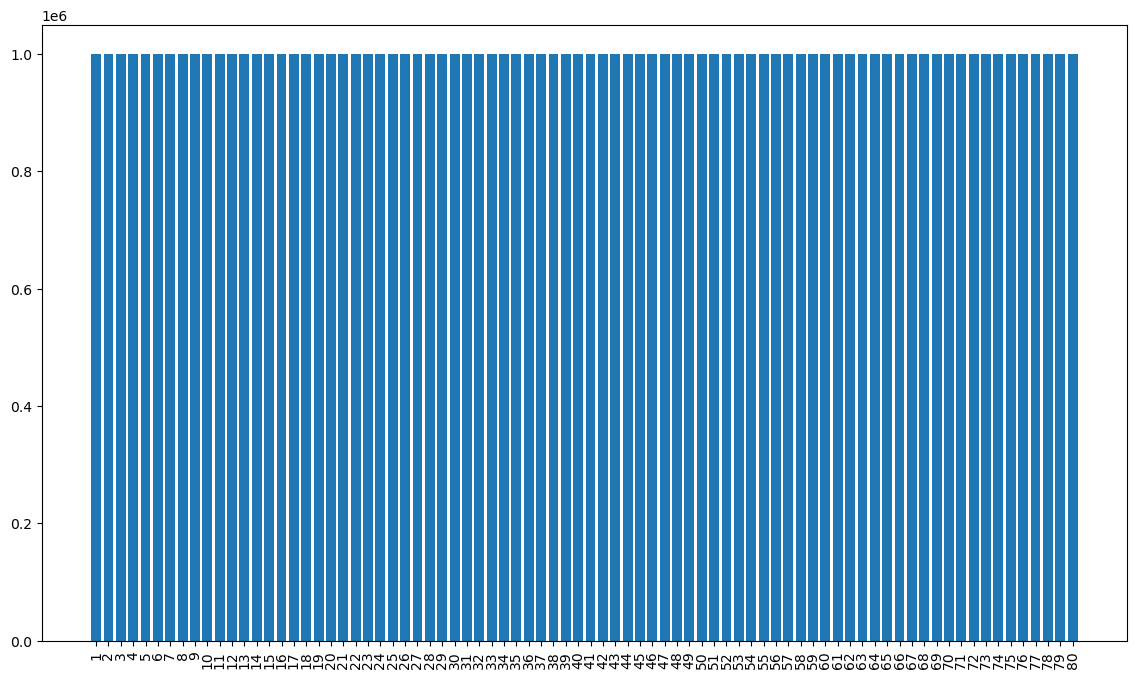

In [13]:
sample_numbers = pd.Series(transcriptomics.columns.tolist()[:-1]).apply(
    lambda x : x.split('_')[1]).values.tolist()
plt.figure(figsize = (14, 8))
plt.bar(x = sample_numbers, height = sum_counts.values)
plt.xticks(rotation = 90)
plt.show()

>We can see that our initial insepction was false and we do not need to normalize our values. We can see this on the bar plot, the data is already normalised in CPM (counts per million).

##### f. Plot the PCA and color by condition

In [14]:
filtered_genes.head(3)

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5


,PC1,PC2,group
55,-57.819146,-16.886307,adipo


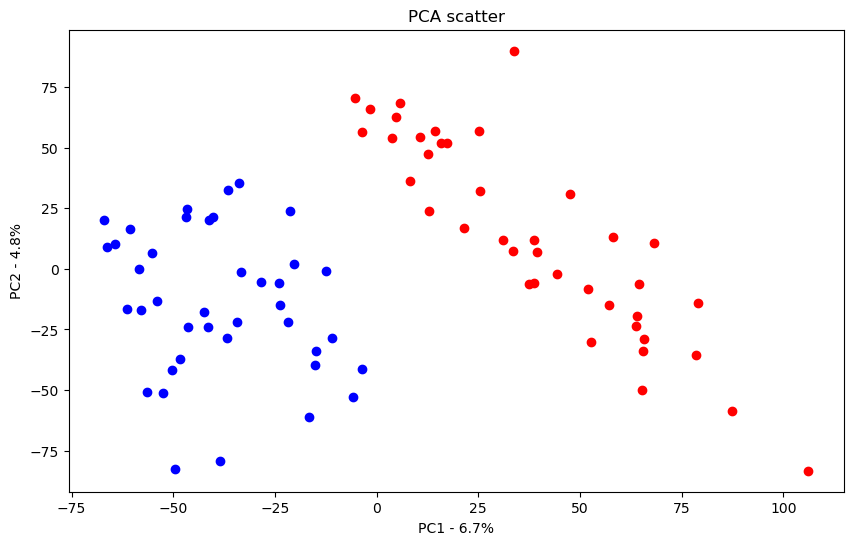

In [15]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_df_for_pca = preprocessing.scale(filtered_genes.T)
#standardizing data is a standard PCA practise, even though here we have the same units for every variant
pca = PCA(n_components = 2)
pca.fit(scaled_df_for_pca)
pca_data = pca.transform(scaled_df_for_pca)

#calculating the explained variance per PC
component_variance = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
plotlabels = ["PC" + str(j) for j in range(1, len(component_variance) + 1)] #10 first components

#using the dictionnary created in question c) to assign a group to each sample
index_to_group = dict(zip(range(len(samples)), sample_group))

pca_df = pd.DataFrame(pca_data, columns = plotlabels)
indexes = pca_df.index.values.tolist()
pca_df['group'] = [index_to_group[idx] for idx in indexes]

#view of obtained pca data
display(pca_df.sample())

#separating into different groups for easier colouring
pca_preadipocyte = pca_df.query('group == "preadi"')
pca_adipocyte = pca_df.query('group == "adipo"')

#pca plotting
plt.figure(figsize = (10, 6))

plt.scatter(pca_preadipocyte.PC1, pca_preadipocyte.PC2, color = 'r')
plt.scatter(pca_adipocyte.PC1, pca_adipocyte.PC2, color = 'b')

plt.title("PCA scatter")
plt.xlabel("PC1 - {0}%".format(component_variance[0]))
plt.ylabel("PC2 - {0}%".format(component_variance[1]))
plt.show()

##### g. Transformation: Perform log2(1+x) transformation of your data.

In [16]:
logged_df = np.log2(filtered_genes + 1)

##### h. Plot the PCA (of the logged data) and color by condition. Which PCA looks more like what you would expect? Continue the next questions using the more appropriate Normalization/Transformation of your dataset.

,PC1,PC2,group
76,-64.75332,-11.0616,adipo


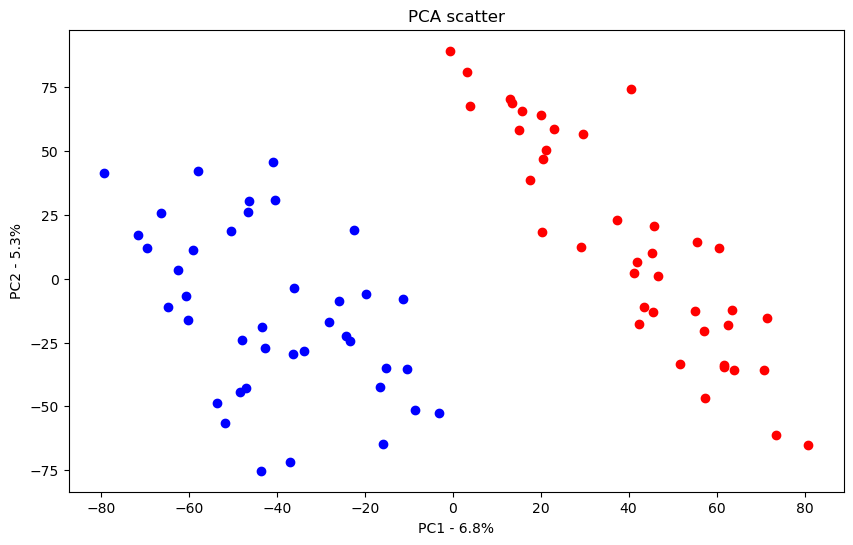

In [17]:
log_scaled_df_for_pca = preprocessing.scale(logged_df.T)
#standardizing data is a standard PCA practise, even though here we have the same units for every variant
log_pca = PCA(n_components = 2)
log_pca.fit(log_scaled_df_for_pca)
pca_data_log = log_pca.transform(log_scaled_df_for_pca)

#calculating the explained variance per PC
component_variance_l = np.round(log_pca.explained_variance_ratio_ * 100, decimals = 1)

#using the dictionnary created in question c) to assign a group to each sample
lpca_df = pd.DataFrame(pca_data_log, columns = plotlabels)
lpca_df['group'] = [index_to_group[idx] for idx in indexes]

display(lpca_df.sample())

lpca_preadipocyte = lpca_df.query('group == "preadi"')
lpca_adipocyte = lpca_df.query('group == "adipo"')

#pca plotting
plt.figure(figsize = (10, 6))

plt.scatter(lpca_preadipocyte.PC1, lpca_preadipocyte.PC2, color = 'r')
plt.scatter(lpca_adipocyte.PC1, lpca_adipocyte.PC2, color = 'b')

plt.title("PCA scatter")
plt.xlabel("PC1 - {0}%".format(component_variance_l[0]))
plt.ylabel("PC2 - {0}%".format(component_variance_l[1]))
plt.show()

##### Which PCA looks more like what you would expect?

> Although the plots are extremely similar, we can see that the **logged**/second PCA has more clearly defined clusters. This is more of what we would expect, as we have a population of samples composed of 2 groups in terms of cell type & therefore gene expression (the focus of our study).

### 2. Differential gene expression

In this part, we will create a separate pandas DataFrame “de_results” to store all results. Rows will be
the filtered genes, and columns will be pval / fdr / log2_mean_preadipo / log2_mean_adipo /
log2_fold_change, that will be computed in the following questions:

##### a. Perform a two-tailed independent t-test on every gene to check if it’s differentially expressed between the two groups (preadipo vs adipo). Store its pvalues in the “de_results” DataFrame.

In [18]:
adipocyte = filtered_genes.loc[:, filtered_genes.columns.str.endswith('adipo')]
preadipocyte = filtered_genes.loc[:, filtered_genes.columns.str.endswith("preadi")]

In [19]:
from scipy.stats import ttest_ind

de_results = pd.DataFrame([], columns = 
            ['pval', 'fdr', 'log2_mean_preadipo', 'log2_mean_adipo', 'log2_fold_change'])

#display(lpca_df, logged_df)
de_results['gene'] = filtered_genes.index
de_results.replace(np.nan, '.', inplace = True)

print('created dataframe "de_results"')
#equal_var = False conducts a Welch test 
#taking the second element of the tuple as it is the pvalue of the ttest
de_results['pval'] = de_results['gene'].apply(lambda g: ttest_ind(adipocyte.loc[g, :], preadipocyte.loc[g, :], 
                                                                  equal_var = False)[1])
print('calculated pvalues')
de_results.sample()

created dataframe "de_results"
calculated pvalues


,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene
15840,0.323475,.,.,.,.,ENSG00000204511


##### b. Adjust the p-values for multiple testing (use FDR correction), and store the output in the fdr column of the “de_results” dataframe. 

In [20]:
from statsmodels.stats.multitest import multipletests

de_results['fdr'] = multipletests(de_results['pval'], method = 'fdr_bh')[1]
de_results.sample()

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene
11095,0.056226,0.207767,.,.,.,ENSG00000168724


##### Why do we need to do that?
> FDR correction is useful when conducting a large number of hypothesis tests in order to control the increasing risk of making a type I error (i.e., incorrectly rejecting the null hypothesis). 

##### c. How many genes are differentially expressed (DE) based on this calculation? (select a threshold, for e.g. FDR < 5%)

In [21]:
print('There are', len(de_results.query('fdr < 0.05')), 'genes differentially expressed.') 
print('About',  round(100*len(de_results.query('fdr < 0.05'))/len(de_results), 1), 
      '% of our initial gene pool.')

There are 5534 genes differentially expressed.
About 18.3 % of our initial gene pool.


##### d. Here we want to focus on genes that are up-regulated in the adipocytes (marker genes). For selecting these, we will first compute the arithmetic mean of gene expression in each group, for each gene, and put the results (logged mean) in the columns log2_mean_preadipo and log2_mean_adipo of the de_results DataFrame.

In [22]:
de_results['log2_mean_preadipo'] = de_results['gene'].apply(lambda g: np.log2(np.mean(preadipocyte.loc[g, :]) + 1))
de_results['log2_mean_adipo'] = de_results['gene'].apply(lambda g: np.log2(np.mean(adipocyte.loc[g, :]) + 1))

##### e. Now compute the log2_fold_change between the two groups.

In [23]:
#calculating fold change with the focus on upregulation of adipocyte gene exression
de_results['log2_fold_change'] = de_results['log2_mean_adipo'] - de_results['log2_mean_preadipo']
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene
0,0.021253,0.098295,3.666757,4.053111,0.386355,ENSG00000000003
1,0.000108,0.001177,0.104337,2.378512,2.274175,ENSG00000000005
2,0.498060,0.652329,3.399171,3.251719,-0.147452,ENSG00000000419
3,0.499683,0.653975,2.887525,3.031219,0.143693,ENSG00000000457
4,0.490003,0.644849,1.432959,1.201634,-0.231326,ENSG00000000460
...,...,...,...,...,...,...
30233,0.355608,0.516809,0.536053,0.944858,0.408806,ENSG00000273485
30234,0.217459,0.480843,0.655352,1.035624,0.380272,ENSG00000273486
30235,0.656405,0.770153,0.035624,0.070389,0.034765,ENSG00000273487
30236,0.021413,0.098864,0.744161,0.070389,-0.673772,ENSG00000273489


##### f. Filter the de_results DataFrame and keep only genes that have FDR < 5% and abs(FC) > 2 (i.e. log2_fold_change > 1). Sort by fold-change.

In [24]:
fde_results = de_results.query('fdr < 0.05 & log2_fold_change > 1').sort_values(
    by = 'log2_fold_change', ascending = False).reset_index(drop = True)
fde_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene
0,2.934142e-14,5.476702e-12,6.845176,13.011066,6.165889,ENSG00000170323
1,5.478484e-13,5.792252e-11,7.183883,13.134579,5.950695,ENSG00000130208
2,2.713443e-13,3.180197e-11,2.255501,7.901772,5.646271,ENSG00000055957
3,3.638201e-14,6.471289e-12,3.520422,9.164656,5.644233,ENSG00000122378
4,1.412364e-13,1.848791e-11,1.419539,6.984988,5.565449,ENSG00000135447
...,...,...,...,...,...,...
1190,1.388945e-09,5.545228e-08,4.346957,5.350497,1.003540,ENSG00000099785
1191,5.419880e-06,8.509155e-05,3.617651,4.620586,1.002935,ENSG00000187824
1192,5.009950e-08,1.331203e-06,4.499846,5.500643,1.000797,ENSG00000100412
1193,3.005450e-05,3.867183e-04,4.710118,5.710806,1.000689,ENSG00000120129


> We are left with 1195 genes

### 3. Investigating top marker genes

##### a. Use the gene annotation file (Homo_sapiens.GRCh37.75.gene_annotation.txt) to annotate your Ensembl IDs. Annotate the genes in the filtered de_results DataFrame by adding a ‘gene_symbol’ column.

In [25]:
display(id_to_genes.sample()) #gene annotation file

#filtered de_results
fde_results['gene_symbol'] = fde_results['gene'].apply(lambda g: id_to_genes[id_to_genes['Ensembl'] == g]['Name'].
                            reset_index(drop = True))
display(fde_results)

,Ensembl,Name,Biotype,GeneLength,SumExonLength
365,ENSG00000227184,EPPK1,protein_coding,13136,7997


,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene,gene_symbol
0,2.934142e-14,5.476702e-12,6.845176,13.011066,6.165889,ENSG00000170323,FABP4
1,5.478484e-13,5.792252e-11,7.183883,13.134579,5.950695,ENSG00000130208,APOC1
2,2.713443e-13,3.180197e-11,2.255501,7.901772,5.646271,ENSG00000055957,ITIH1
3,3.638201e-14,6.471289e-12,3.520422,9.164656,5.644233,ENSG00000122378,FAM213A
4,1.412364e-13,1.848791e-11,1.419539,6.984988,5.565449,ENSG00000135447,PPP1R1A
...,...,...,...,...,...,...,...
1190,1.388945e-09,5.545228e-08,4.346957,5.350497,1.003540,ENSG00000099785,MARCH2
1191,5.419880e-06,8.509155e-05,3.617651,4.620586,1.002935,ENSG00000187824,TMEM220
1192,5.009950e-08,1.331203e-06,4.499846,5.500643,1.000797,ENSG00000100412,ACO2
1193,3.005450e-05,3.867183e-04,4.710118,5.710806,1.000689,ENSG00000120129,DUSP1


>We can see that FABP4 gene has the highest fold change, which means the highest significant up regulated expression in adipocytes. 

##### b. Plot the expression of the top marker gene as two side-by-side plots, one with expression as a gradient color in the PCA, and another as two boxplots showing expression of this gene for each sample in the two groups. Put the Ensembl name and Gene symbol in the title of the plot.

In [26]:
loading_scores = pd.DataFrame([pd.Series(pca.components_[i], index = filtered_genes.T.columns) 
                for i in range(len(pca.components_))])

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

def minMaxScale(data, imposed_minimum = None, imposed_maximum = None, fit = False): #min max scaling
    mini = min(data)
    maxi = max(data)
    
    if (imposed_minimum != None): mini = imposed_minimum
    if (imposed_maximum != None): maxi = imposed_maximum
    if (fit == False):
        return (data - mini)/(maxi - mini)
    else: 
        return [mini, maxi]

def mgPlot(gene_symbol, pca_df, df):
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 6))
    gene = fde_results.query(f'gene_symbol == "{gene_symbol}"')['gene'].values.tolist()[0]
    print('gene code = ', gene, '\n')
    #palette = sns.cubehelix_palette(start = 0, rot = 0.5, dark = 0.30, as_cmap = True, hue = 1)
    
    #pca gradient
    #Gene specific expression per cell
    GSEpC = loading_scores[gene].values.tolist() #returns 1d array of 2 floats
    pca_df['color'] = pca_df.apply(lambda s: s['PC1']*GSEpC[0] + s['PC2']*GSEpC[1], axis = 1)
    ax[0].scatter(pca_df['PC1'], pca_df['PC2'], c = pca_df['color'])
    
    ax[0].set_title(f'PCA plot with {gene_symbol} expression gradient \n ({gene})')
    ax[0].set_xlabel('PC1')
    ax[0].set_ylabel('PC2')
    
    #boxplots of expressions per group
    expressions = pd.DataFrame([df.loc[gene, df.columns.str.endswith('adipo')].reset_index(drop = True), df.loc[
        gene, df.columns.str.endswith('preadi')].reset_index(drop = True)], index = ['adipo', 'preadi'])
    #display(expressions)
    ax[1] = sns.boxplot(data = expressions.T, palette = 'Greens')
    ax[1].set_title(f'Boxplot of {gene_symbol} expression in both groups \n ({gene}) ')
    ax[1].set_ylabel('CPM')
    
    
    cmap = mpl.cm.viridis
    #Color bar ticks have negative values due to the PCA (axes have been relocated for maximum variance)
    #This results in negative expression levels for cells and should be interpreted as relative expression levels
    #relative to our principal components.
    #For visualization purposes we have min-max scaled these relative expression levels 
    #and computed them as a percentage
    bounds = round(100*minMaxScale(pca_df['color']), 1).sort_values().values.tolist() 
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='3%', pad=0.1)
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax = cax)
    
    plt.subplots_adjust( right = 1)
    plt.show()

gene code =  ENSG00000170323 



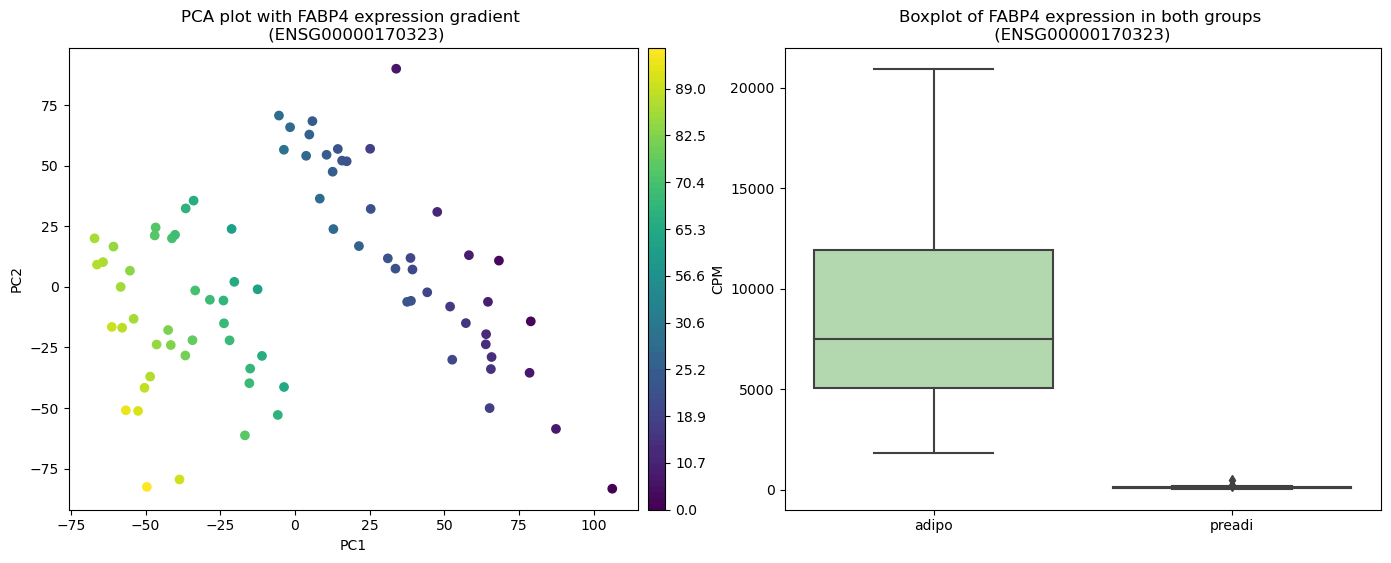

In [27]:
mgPlot('FABP4', pca_df, filtered_genes)

##### c. Amongst the most common marker genes for adipocytes are Adipoq / Fabp4 / PParg. What is their rank in your list of DE genes? Plot their expression the same way you did for 3.b.

In [28]:
common = ['Adipoq' ,'Fabp4' ,'PParg'] #list of common marker genes
ranks = [(fde_results.query(f'gene_symbol == "{mg.upper()}"').index.values[0] + 1) for mg in common] #marker gene
pd.DataFrame([common, ranks], index = ['Gene', 'Rank in DE']).T

,Gene,Rank in DE
0,Adipoq,14
1,Fabp4,1
2,PParg,151


> The rank in DE has been determinated by the top genes that have statistically significant & upregulated expressions in adipocytes.

>Since we have already plotted the Fabp4 expression plots we shall only plot the other 2 marker genes

gene code =  ENSG00000181092 



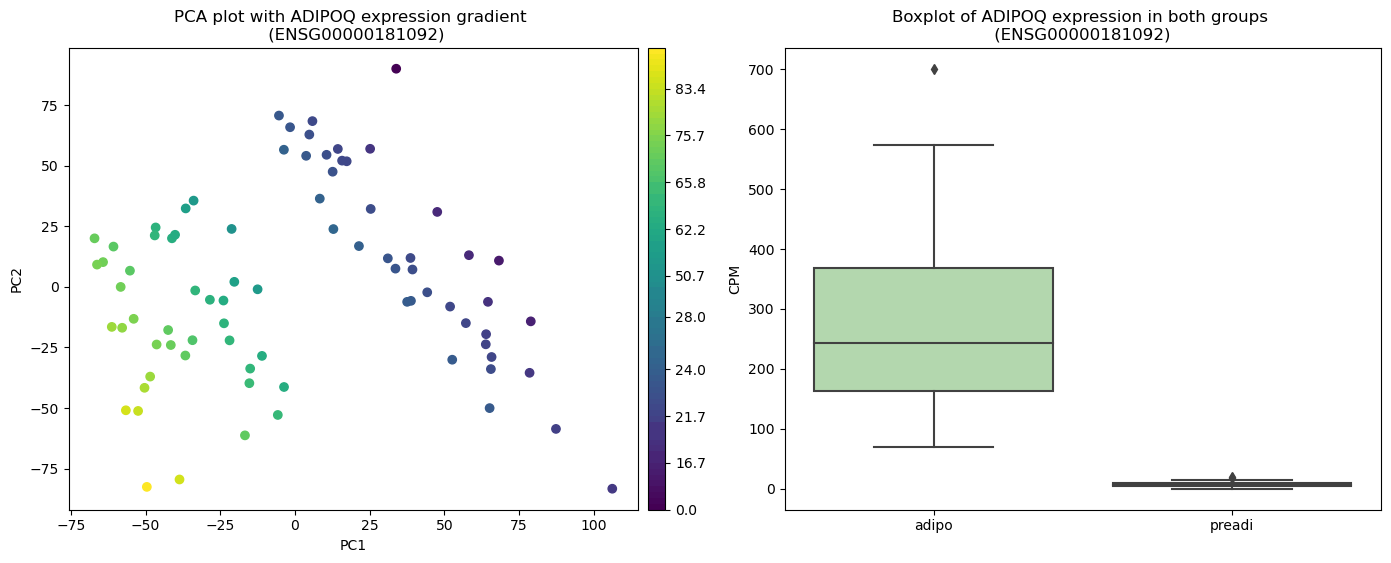

gene code =  ENSG00000132170 



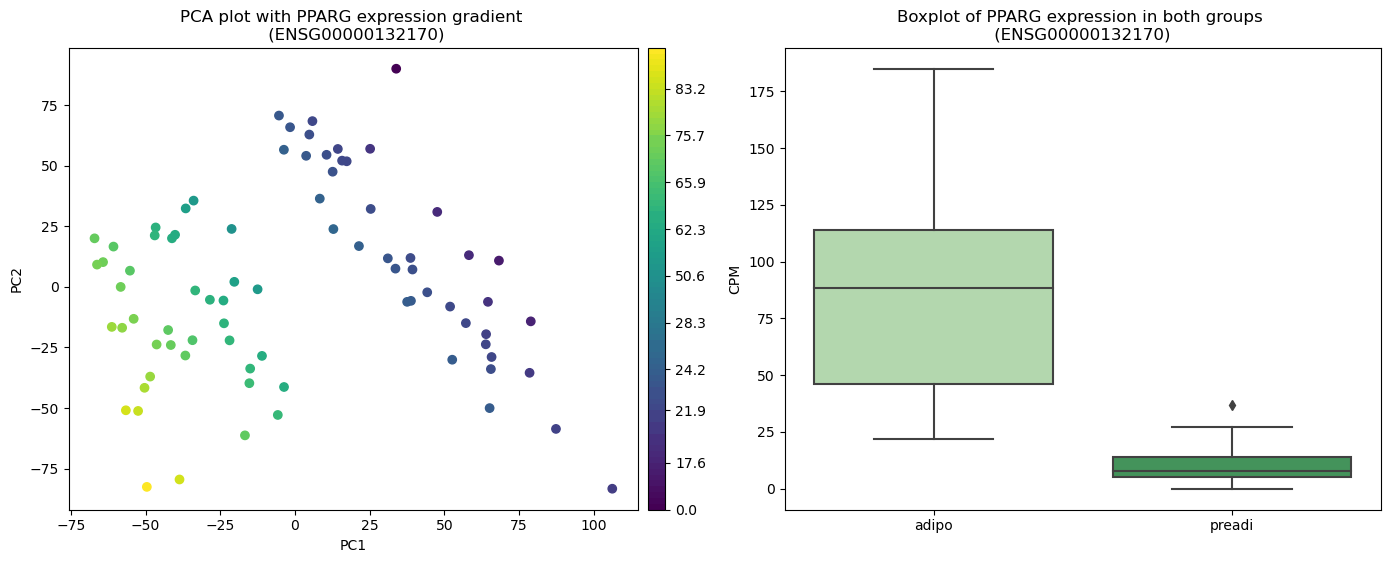

In [29]:
for mg in ['Adipoq', 'PParg']:
    mgPlot(mg.upper(), pca_df, filtered_genes)

d. **Plot the top 20 up-regulated genes and top 20 down-regulated genes as a heatmap**. Try to make the most “publishable” figure. For e.g. by displaying the dendrograms, annotating the samples, pick a nice colormap, etc.

statistically significant genes without cutting for only upregulated
top adipo & preadipocyte genes computed 



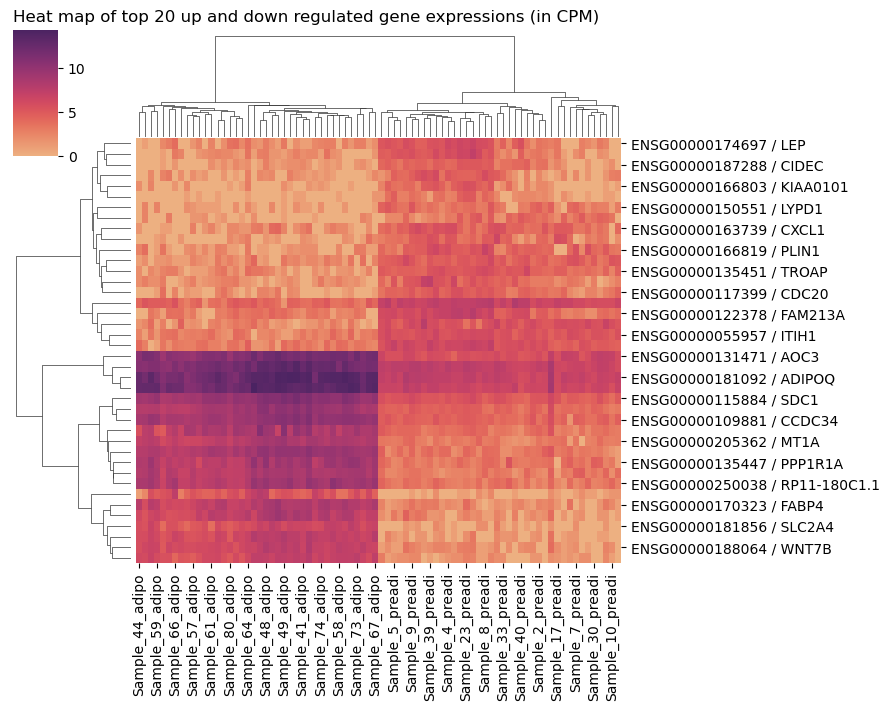

In [30]:
#statistically significant DE genes
sde_results = de_results.sort_values(by = 'log2_fold_change').query('fdr < 0.05').reset_index() 

print('statistically significant genes without cutting for only upregulated')
#top20 upregulated columns is the genes and rows is the expression per sample
upReg = sde_results.tail(20).reset_index(drop = True)
downReg = sde_results.head(20).reset_index(drop = True) #down regulated

#adding [::-1] to have top upregulated genes in the top left corner
genesID = pd.DataFrame(upReg['gene'].values.tolist()[::-1] + downReg['gene'].values.tolist()[::-1]).T
print('top adipo & preadipocyte genes computed \n') 


#heat map plotting
map_data = logged_df[logged_df.index.isin(genesID.loc[0])]
map_data.index = genesID.T[0].apply(lambda gc: gc + ' / ' + 
                id_to_genes[id_to_genes['Ensembl'] == gc]['Name'].reset_index(drop = True))[0].values.tolist()

sns.clustermap(map_data, figsize = (9, 7), cmap = 'flare')
plt.title('Heat map of top 20 up and down regulated gene expressions (in CPM)', loc = 'left')
plt.show()

### 4. Functional enrichment (Bonus)

When we perform differential expression, we may end up with a big list of genes, not knowing their
biological function overall. An easy way to get some biological meaning of a list of genes is to perform
functional enrichment into an annotated database. These databases contain annotation of genes into
certain cell types, biological pathways, etc… Most of the time it is represented as gene sets, i.e. and
array of genes that are annotated as “Adipogenesis” for e.g. So, the database contains plenty of
these genesets that annotate cell types/pathways/etc..
When you have a list of genes (for e.g. differentially expressed genes), you can find out if they are
enriched in a specific gene set/category by performing a Fisher’s Exact Test on the following
contingency table:

##### a. Create the 2x2 contingency table of this example (as a matrix with 2 rows/2columns, the sums are not needed)

In [31]:
contingency_tab = [[1962, 9803],
                   [118, 709]]

##### b. Calculate the p-value associated, is it significant at 5% threshold?

>The p-value is the probability of obtaining a test statistic at least as extreme as the one that was actually observed, given that the null hypothesis is true. 

In [32]:
from scipy.stats import fisher_exact 

oddsratio, p = fisher_exact(contingency_tab)
print("p value = ", p)

p value =  0.07309834306791607


> As we can see the p value is > 0.05, then it is not statistically significant at the 5% threshold. This means that we don't have enough evidence to reject the null hypothesis that there is no enrichment among the genes that we are studying.

##### c. Download the “Human_Gene_Atlas” gene set database from https://amp.pharm.mssm.edu/Enrichr/#stats. This file contains marker genes for many cell types in Human. You will see that the file format is very peculiar, so find a way to read the file in Python and store the gene sets.

In [33]:
d = pd.read_csv('Human_Gene_Atlas', sep = ',', on_bad_lines='skip')

In [34]:
#Function to read the Human Gene Atlas file
celltypes = []
celltypes.append(d.columns[0].split('\t')[0])
genes = []
genesTYPE = []
genesTYPE.append(d.columns[0].split('\t')[2])
for g in d.columns[1:]:
    genesTYPE.append(g.split('\t')[1])
    
genes.append(genesTYPE)
cd = pd.DataFrame()#clean d

for gl in d.index:
    
    celltypes.append(gl[0].split('\t')[0])
    genesTYPEi = []
    
    genesTYPEi.append(gl[0].split('\t')[2])
    
    for g in gl:
        split = str(g).split('\t')
        if (len(split) > 1):
            genesTYPEi.append(split[1])
            
    for gt in d.loc[gl, :]:
        split = str(gt).split('\t')
        if (len(split) > 1):
            genesTYPEi.append(split[1])
        
        
    genes.append(genesTYPEi)
    
lens = []
for  g in genes:
    lens.append(len(g))

lendf = pd.DataFrame([celltypes, lens], index = ['ct', 'len']).T
print(max(lens))
dgood = pd.DataFrame(genes, index = celltypes).T
lendf.sort_values(by = 'len', ascending = False).reset_index(drop = True).head(20)

dgood

680


,Thyroid,CD33+ Myeloid,Testis,Salivarygland,CD14+ Monocytes,TestisLeydigCell,Ovary,CD8+ Tcells,Tonsil,TestisIntersitial,...,TrigeminalGanglion,Lung,Amygdala,Skin,PrefrontalCortex,TestisGermCell,Lymphnode,small intestine,Kidney,Leukemia promyelocytic-HL-60
0,ZFYVE21,ACOT9,HSPA1L,RARRES1,ARL11,SPINK2,RARRES1,DKFZP434B0335,GBP6,ZNF165,...,OR8H3,SLC12A4,B3GALNT1,KRT1,CDK19,SMARCA1,SLC36A2,LOC100293440,SLC12A3,EIF5B
1,TMEM80,,,,,,,,,,...,,,,,,,,,,
2,GRIN2C,HOMER3,RSPH6A,PHLDA1,DYNC2H1,BTBD15,TMEM86A,LRRC37A3,GABRP,MGC2599,...,TTC39A,BAD,GPR37L1,KRT2,WSB1,DKFZP667G2110,PLA2G2D,ACSL5,CA12,EIF5A
3,SCAMP4,PCGF3,RFX4,CRYGS,SLC35A1,IFT81,AASS,MGC3207,CR2,HSPA1L,...,ZNF287,CACNA2D2,MAPK8IP1,FLJ32786,HOMER1,SFMBT1,CCL21,LOC55970,EGF,ATAD3A
4,C20ORF22,HUS1,ASRGL1,SLC31A2,NUP214,RFX2,INSR,CASP8AP2,PLA2G2D,KIAA0494,...,RUNX1,HPCAL1,HPCAL4,CD3EAP,SYTL2,HSPA1L,FCRL5,MALL,SLC12A1,NIPSNAP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,None,HLX,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
676,None,TDG,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
677,None,TRA2B,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
678,None,BNIP2,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


> We can see here, our Human Gene Atlas contains different cell types and their associated genes

Below we can see the 5 cell types that have the most genes.

In [35]:
lendf.sort_values(by = 'len', ascending = False).head(5)

,ct,len
1,CD33+ Myeloid,680
70,pineal night,676
29,CD34+,647
28,Liver,620
7,CD8+ Tcells,604


##### We keep only genes that overlap with the genes in our dataset: 

In [36]:
clean_db = []
#Keeping only the genes that overlap
for celltype in dgood.columns:
    common_genes = list(set(id_to_genes['Name']).intersection(dgood[celltype]))
    clean_db.append(common_genes)
    
clean = pd.DataFrame(clean_db, index = dgood.columns).T
#clean dataframe contains only overlapping genes
clean

,Thyroid,CD33+ Myeloid,Testis,Salivarygland,CD14+ Monocytes,TestisLeydigCell,Ovary,CD8+ Tcells,Tonsil,TestisIntersitial,...,TrigeminalGanglion,Lung,Amygdala,Skin,PrefrontalCortex,TestisGermCell,Lymphnode,small intestine,Kidney,Leukemia promyelocytic-HL-60
0,AKAP1,ZFP36,SCCPDH,DEFB1,MYO9B,B9D2,AASS,DYRK2,IGLJ3,LRRC6,...,TTTY6,GRK5,SEMA3E,CCL27,KLHDC3,LRRC6,IGLJ3,CTNND1,NFAM1,SMC3
1,PHF12,MYO9B,TBPL1,HTN3,XRN2,BBS5,IGFBP5,ARHGAP12,DSG3,AKAP1,...,STIL,SASH1,GUCY1B3,LY6G6C,PIK3R1,PAQR3,CD209,DNASE1,ALDH6A1,SWAP70
2,CSGALNACT1,PDPK1,PKNOX1,MUC19,EXOC3,PPP2R1B,CAPN13,PIK3R1,LCE3D,ZBBX,...,SCAPER,IRX3,CDC42BPB,ZFP28,CHD5,NBR1,CXCL9,CCL13,ACY1,TFB1M
3,GTF2F1,ITGAM,PIGV,HTN1,TBC1D2,IFT81,CHST7,ZNF721,ZNF277,ZMYND10,...,USP19,CDH5,KCNH3,DSG1,DEAF1,AKAP1,CCL18,PLAT,HAO2,CHI3L2
4,ZNF771,SEC23B,FKBP1A,FOXC1,SGSH,KCTD19,ABCA10,ZNF546,TMPRSS11D,KIF21B,...,ZC3H7B,TBC1D2,CCDC91,SCGB2A2,DIP2B,FAM76B,IGHM,SAR1B,RC3H1,PDE4DIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
617,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
618,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
619,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [37]:
diff = []
for celltype in dgood.columns:
    diff.append(len(dgood[celltype].dropna()) - len(clean[celltype].dropna()))
        
np.mean(diff)

33.54320987654321

> We removed on average around 33.5 genes per cell type. These were genes that weren't overlapping with the genes of our dataset and could not be found as a DE gene anyways, so they should not be counted.

##### d. Perform functional enrichment on the Adipocyte gene set, with your top 20 list of up-regulated DE genes in the adipocyte samples. Is it significant?

In [38]:
n = 20 #top 20 up regulated genes 
top_ur20 = fde_results.head(n)['gene_symbol']

def contigency_matrix(celltype):
    geneset = clean[celltype].dropna()
    i1 = list(set(geneset).intersection(top_ur20))
    i2 = list(set(geneset).intersection(fde_results['gene_symbol'].iloc[n:]))

    DC = len(i1)
    D_C = len(i2)
    DC_ = len(top_ur20)-DC
    D_C_ = len(fde_results['gene_symbol'].iloc[n:])-D_C

    return [[DC, D_C],
            [DC_, D_C_]]


In [39]:
oddsratio, p = fisher_exact(contigency_matrix('Adipocyte'))
print("p value = ", p)

p value =  5.367751834154405e-06


> Our p value from the Fisher test is extremely significant. This makes sense as we are comparing our 20 top up-regulated DE genes with the genes associated with the Adipocyte cell type in the Human Gene Atlas.

##### e. Now, run the enrichment on each gene set of the database. Store the p-values and correct for multiple testing. Then sort the results by p-values and check the significant genesets at FDR5%. Which gene sets are the most significant? Does it make sense?

In [40]:
p_values = []
for celltype in clean.columns:
    oddsratio, p = fisher_exact(contigency_matrix(celltype))
    p_values.append(p)

corrected_pvalues = list(multipletests(p_values, method= 'fdr_bh')[1])
corrected_pvalues
results = pd.DataFrame(corrected_pvalues, index=clean.columns, columns=['Associated p_value']).sort_values(
    by='Associated p_value', ascending=True)
results.head(10)

,Associated p_value
Adipocyte,0.000435
Liver,0.002992
Leukemia promyelocytic-HL-60,0.896575
Leukemia chronicMyelogenousK-562,1.000000
OccipitalLobe,1.000000
GlobusPallidus,1.000000
AdrenalCortex,1.000000
Pituitary,1.000000
CD71+ EarlyErythroid,1.000000
Uterus,1.000000


The gene sets that are the most significant are the **Adipocyte and the Liver gene sets**. 

After some research, we can conclude this makes perfect sense as there are certain **genes that are shared between adipose tissue and the liver**. These genes are involved in the immune response and can be upregulated in response to various stimuli, including obesity.

For example, the gene **"FABP4"**, which stands for "fatty acid binding protein 4," **is expressed in both liver and adipose tissue**.  In the liver, FABP4 is involved in the metabolism of fatty acids and the synthesis of lipids, while in adipose tissue, it plays a role in the storage of fatty acids. Both cell types play a role in the regulation of metabolism.